# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going through an example machine learning project with the goal of predicting with the goal of predicting the sale price of bulldozers.

## 1. Problem defination

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition:  https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the datasets. You can view this data dictionary on google sheets:
https://docs.google.com/spreadsheets/d/1kyRicC3umZzKjX5tuIo9o79iwPr8fE1BmpP_r8ZGI8M/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import the training and validation datasets
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
 df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

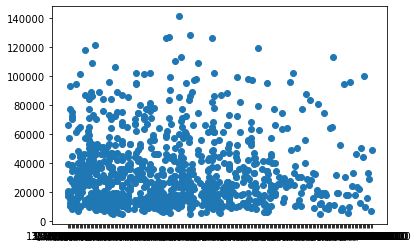

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [7]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

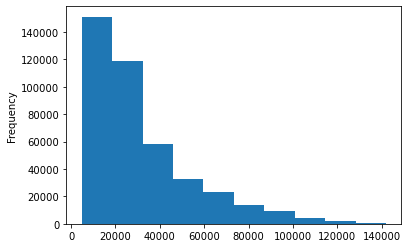

In [8]:
df.SalePrice.plot.hist();

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using `parse_dates` parameter. 



In [241]:
# Import data again but this time parse dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [242]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.saledate.dtype

dtype('<M8[ns]')

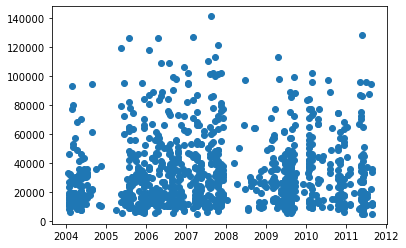

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [13]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original DataFrame so when we manipulate the copy we've still got our original data.

In [14]:
# Make a copy
df_cp = df.copy()

In [15]:
df_cp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [16]:
df_cp["saleYear"] = df_cp.saledate.dt.year
df_cp["saleMonth"] = df_cp.saledate.dt.month
df_cp["saleDay"] = df_cp.saledate.dt.day
df_cp["saleDayOfWeek"] = df_cp.saledate.dt.dayofweek
df_cp["saleDayOfYear"] = df_cp.saledate.dt.dayofyear

In [17]:
df_cp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# Now we have enriched our DataFrame with daytime features,  we can remove saledate
df_cp.drop("saledate", axis=1, inplace=True)

In [19]:
df_cp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [20]:
# Check the values of different column
df_cp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling


In [21]:
# Lets build a ml model
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_cp.drop("SalePrice", axis=1), df_cp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [ ]:
df_cp.info()

### Converting string to categories





In [ ]:
df_cp.head().T

In [ ]:
pd.api.types.is_string_dtype(df_cp["UsageBand"])

In [22]:
# Find the columns which contain strings
for label, content in df_cp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
# This will turn all the c=string values into category values 
for label, content in df_cp.items():
    if pd.api.types.is_string_dtype(content):
        df_cp[label] = content.astype("category").cat.as_ordered()

In [24]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [25]:
df_cp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [26]:
# lets check percentage of missing values
df_cp.isnull().sum()/len(df_cp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data 

In [27]:
# Export current cp dataframe
df_cp.to_csv("bluebook-for-bulldozers/train_cp.csv",
            index=False)

In [28]:
# Import preprocessed state
df_cp = pd.read_csv("bluebook-for-bulldozers/train_cp.csv",
                    low_memory=False)
df_cp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill missing values

### Fill numeric missing value first

In [29]:
for label, content in df_cp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [30]:
# Check for which numeric column has null values
for label, content in df_cp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# Fill null numeric rows with median
for label, content in df_cp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_cp[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_cp[label] = content.fillna(content.median())

In [32]:
# check if there is any missing values

for label, content in df_cp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [33]:
# Check how many values were missing

df_cp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [34]:
df_cp.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [37]:
# Check the columns which aren't numeric
 
for label, content in df_cp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_cp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value or not
        df_cp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_cp[label] = pd.Categorical(content).codes+1

In [40]:
df_cp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [41]:
pd.Categorical(df_cp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Now that all of our data is numeric as well as our dataframe has no missing value, we should be able to build a machine learning model

In [43]:
df_cp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [44]:
%%time
# Instantiate a modeel
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_cp.drop("SalePrice", axis=1), df_cp["SalePrice"])

Wall time: 7min 39s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [45]:
# Score the model
model.score(df_cp.drop("SalePrice", axis=1), df_cp["SalePrice"])

0.9875468079970562

In [46]:
df_cp.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True
412697,6283635,34000.0,1869284,4701,149,99.0,1000,0.0,0,989,...,True,True,True,True,True,True,True,True,False,False


# filling train and validation variable separately 

In [69]:
df_cp1 = pd.read_csv("bluebook-for-bulldozers/train_cp.csv",
                    low_memory=False)

In [70]:
df_cp1.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [71]:
# split the data
df_cp_train = df_cp1[df_cp1.saleYear != 2012]
df_cp_valid = df_cp1[df_cp1.saleYear == 2012]

## For training set

In [72]:
# fill misising numeric values

for label,content in df_cp_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_cp_train[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_cp_train[label] = content.fillna(content.median())
            print(label)

auctioneerID
MachineHoursCurrentMeter


C:\Users\HP\AppData\Local\Temp/ipykernel_17452/945362728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_train[label+"_is_missing"] = pd.isnull(content)
C:\Users\HP\AppData\Local\Temp/ipykernel_17452/945362728.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_train[label] = content.fillna(content.median())


In [74]:
# check for any missing numeric value
for label,content in df_cp_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print("yes")
        else:
            print("no")

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


In [75]:
# Fill missing non numeric values
for label, content in df_cp_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [76]:
 for label, content in df_cp_train.items():
    if not pd.api.types.is_numeric_dtype(content):       
        # Add binary column to indicate whether sample had missing value or not
        df_cp_train[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_cp_train[label] = pd.Categorical(content).codes+1

C:\Users\HP\AppData\Local\Temp/ipykernel_17452/2640859461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_train[label+"_is_missing"] = pd.isnull(content)
C:\Users\HP\AppData\Local\Temp/ipykernel_17452/2640859461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_train[label] = pd.Categorical(content).codes+1


In [80]:
df_cp_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## For validation set

In [83]:
# filling numeric values
for label, content in df_cp_valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_cp_valid[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_cp_valid[label] = content.fillna(content.median())    

C:\Users\HP\AppData\Local\Temp/ipykernel_17452/888161332.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_valid[label+"_is_missing"] = pd.isnull(content)
C:\Users\HP\AppData\Local\Temp/ipykernel_17452/888161332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_valid[label] = content.fillna(content.median())


In [87]:
# check for any missing numeriv values
for label, content in df_cp_valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print("yes")
        else:
            print("no")

no
no
no
no
no
no
no
no
no
no
no
no
no
no


In [88]:
# filling non mumeric values
for label, content in df_cp_valid.items():
    if not pd.api.types.is_numeric_dtype(content):       
        # Add binary column to indicate whether sample had missing value or not
        df_cp_valid[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_cp_valid[label] = pd.Categorical(content).codes+1

C:\Users\HP\AppData\Local\Temp/ipykernel_17452/1149848840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_valid[label+"_is_missing"] = pd.isnull(content)
C:\Users\HP\AppData\Local\Temp/ipykernel_17452/1149848840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_valid[label] = pd.Categorical(content).codes+1


In [94]:
df_cp_train.shape, df_cp_valid.shape, 

((401125, 103), (11573, 102))

In [95]:
df_cp_valid.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [96]:
df_cp_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## **note: The `auctioneerID_is_missing` in below code is inserted in the last index of the dataframe, so it will effect the performance of the model

In [144]:
df_cp_valid["auctioneerID_is_missing"] = False

C:\Users\HP\AppData\Local\Temp/ipykernel_17452/899929520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp_valid["auctioneerID_is_missing"] = False


In [152]:
df_cp_valid.auctioneerID_is_missing.dtypes

dtype('bool')

In [155]:
df_cp_valid.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 103, dtype: object

In [153]:
df_cp_valid.shape, df_cp_train.shape

((11573, 103), (401125, 103))

# Splitting the data

In [172]:
X_train, y_train = df_cp_train.drop("SalePrice", axis=1), df_cp_train.SalePrice
X_valid, y_valid = df_cp_valid.drop("SalePrice", axis=1), df_cp_valid.SalePrice

In [124]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [156]:
%%time

# Fitting the model
model = RandomForestRegressor() 

model.fit(X_train, y_train)


Wall time: 13min 31s


RandomForestRegressor()

In [171]:
for label, content in df_cp_valid.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [183]:
model.score(X_valid, y_valid)

0.4841183408871005

# **Note: Don't run below codes again**

#### Below i have inserted the `auctioneerID_is_missing` in the valid dataset in same index as that of training dataset

In [107]:
df_cp_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [108]:
df_cp_valid.head().T

,401125,401126,401127,401128,401129
SalesID,4449186,1222855,6258613,6282680,6282759
SalePrice,46173.2,66000.0,26800.0,42100.0,62100.0
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
...,...,...,...,...,...
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True
Steering_Controls_is_missing,True,True,True,True,True


In [113]:
df_cp_train.columns.get_loc("auctioneerID_is_missing")

57

In [114]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_cp_valid.drop("auctioneerID_is_missing", axis=1, inplace=True)

In [148]:
df_cp_valid.auctioneerID_is_missing

AttributeError: 'DataFrame' object has no attribute 'auctioneerID_is_missing'

In [149]:
df_cp_valid.insert(57, 'auctioneerID_is_missing', False)

In [150]:
df_cp_valid.auctioneerID_is_missing

401125    False
401126    False
401127    False
401128    False
401129    False
          ...  
412693    False
412694    False
412695    False
412696    False
412697    False
Name: auctioneerID_is_missing, Length: 11573, dtype: bool

In [151]:
df_cp_valid.columns.get_loc("auctioneerID_is_missing")

57

## **Note: Run from here**

In [140]:
df_cp_valid.auctioneerID_is_missing.value_counts

<bound method IndexOpsMixin.value_counts of 401125    False
401126    False
401127    False
401128    False
401129    False
          ...  
412693    False
412694    False
412695    False
412696    False
412697    False
Name: auctioneerID_is_missing, Length: 11573, dtype: bool>

In [163]:
df_cp_train.auctioneerID_is_missing

0         False
1         False
2         False
3         False
4         False
          ...  
401120    False
401121    False
401122    False
401123    False
401124    False
Name: auctioneerID_is_missing, Length: 401125, dtype: bool

In [164]:
df_cp_valid.auctioneerID_is_missing

401125    False
401126    False
401127    False
401128    False
401129    False
          ...  
412693    False
412694    False
412695    False
412696    False
412697    False
Name: auctioneerID_is_missing, Length: 11573, dtype: bool

In [176]:
df_cp_train.T

,0,1,2,3,4,5,6,7,8,9,...,401115,401116,401117,401118,401119,401120,401121,401122,401123,401124
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6311722,6261568,6261027,6261980,6260754,6260687,6312170,6312727,6315051,6260878
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,11500.0,10000.0,27000.0,43500.0,28000.0,29000.0,11000.0,11000.0,18000.0,13500.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1847105,1891153,434680,1557037,1907502,1074871,1812622,1811599,1858173,1799594
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,9580,4089,3538,1211,4333,4331,9580,9580,17432,4102
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Blade_Type_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Travel_Controls_is_missing,False,True,False,True,False,False,True,True,False,True,...,True,False,True,True,True,True,True,True,True,False
Differential_Type_is_missing,True,False,True,False,True,True,False,False,True,True,...,True,True,True,True,False,False,True,True,True,True


In [177]:
df_cp_valid.T

,401125,401126,401127,401128,401129,401130,401131,401132,401133,401134,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,4449186,1222855,6258613,6282680,6282759,1222845,6305054,1222879,1222867,1222865,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,46173.2,66000.0,26800.0,42100.0,62100.0,35000.0,64000.0,28000.0,65000.0,39000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,2318824,531393,1810917,1543404,1863077,1032841,1851308,1063944,1012231,1021791,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,26964,23926,13260,1830,11390,4701,385,8851,28540,22653,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,173,121,149,149,149,121,149,121,121,121,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True,False,True,True,True,True,...,False,True,True,False,True,True,True,True,True,False


In [181]:
df_cp_valid.columns.get_loc("auctioneerID_is_missing")

57

## Creating custom evaluating fnction

In [191]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean sqaured log error between predictions and true labels 
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "valid R^2": r2_score(y_valid, val_preds)
             }
    return scores

## Testing our model on a subset(to tune the hyperparameters)

In [185]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [186]:
%%time
# Cutting down on the max no. of samples each estimators can see improves
model.fit(X_train, y_train)

Wall time: 19.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [192]:
show_scores(model)

{'Training MAE': 5561.286907148645,
 'Valid MAE': 9792.934450877043,
 'Training RMSLE': 0.2577478749317532,
 'Valid RMSLE': 0.3901355992372278,
 'Training R^2': 0.8606644092878912,
 'valid R^2': 0.661834841571406}

In [ ]:
### Hyper

In [195]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                               random_state=42),
                         param_distributions=rf_grid,
                         n_iter=2,
                         cv=5,
                         verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 1min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [196]:
show_scores(rs_model)

{'Training MAE': 9838.175699672223,
 'Valid MAE': 12587.01208481767,
 'Training RMSLE': 0.42272500385623846,
 'Valid RMSLE': 0.48695877009228383,
 'Training R^2': 0.6212465414304847,
 'valid R^2': 0.5505729758785367}

In [203]:
rs_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(n_jobs=-1, random_state=42),
 'n_iter': 2,
 'n_jobs': None,
 'param_distributions': {'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
  'max_depth': [None, 3, 5, 10],
  'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
  'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
  'max_features': [0.5, 1, 'sqrt', '

## Train a model with the best hyperparameters

In [205]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40 ,
                                   min_samples_leaf=1 ,
                                   min_samples_split=2 ,
                                   max_features='auto' ,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
# Fit the model
ideal_model.fit(X_train, y_train)

Wall time: 3min 33s


RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42)

In [206]:
show_scores(ideal_model)

{'Training MAE': 1619.974621003428,
 'Valid MAE': 11027.311673723321,
 'Training RMSLE': 0.08693003206393571,
 'Valid RMSLE': 0.49315092946282807,
 'Training R^2': 0.9865376422599514,
 'valid R^2': 0.4913925167144746}

In [302]:
# Make predictions on the test data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [303]:
# for label, content in df_test.items():
#         if pd.api.types.is_string_dtype(content):
#             df_test[label] = content.astype("category").cat.as_ordered()

In [304]:
df_test.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

### Preproccesing the data(getting the test dataset int he same format as our training dataset)


In [305]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    
        
    # Fill the missing numeric rows  with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill the missing numeric values with median
                df[label] = content.fillna(content.median())

        # Fill categorical missing values
        if not pd.api.types.is_numeric_dtype(content):       
            # Add binary column to indicate whether sample had missing value or not
             df[label+"_is_missing"] = pd.isnull(content)
             # Turn categories into numbers and add +1
             df[label] = pd.Categorical(content).codes+1
            
    return df

In [300]:
#  for label,content in df_test.items():
#     if not pd.api.types.is_numeric_dtype(content):       
#                 # Add binary column to indicate whether sample had missing value or not
#                 df_test[label+"_is_missing"] = pd.isnull(content)
#                 # Turn categories into numbers and add +1
#                 df_test[label] = pd.Categorical(content).codes+1

In [306]:
df_test = preprocess_data(df_test)

In [307]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [308]:
test_preds = ideal_model.predict(df_test)

D:\machine-learning\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [309]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2324,711,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1799,556,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2095,681,...,True,True,True,True,True,False,False,False,True,True


In [311]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [313]:
df_test.insert(56, 'auctioneerID_is_missing', False)

In [312]:
X_train.columns.get_loc("auctioneerID_is_missing")

56

In [314]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [315]:
test_preds = ideal_model.predict(df_test)

In [316]:
test_preds

array([22100.  , 20733.75, 48237.5 , ..., 11687.5 , 17350.  , 33162.5 ])

In [318]:
# Formatting predictions into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds

,SalesID,SalesPrice
0,1227829,22100.00
1,1227844,20733.75
2,1227847,48237.50
3,1227848,83175.00
4,1227863,51457.50
...,...,...
12452,6643171,52400.00
12453,6643173,11031.25
12454,6643184,11687.50
12455,6643186,17350.00


In [319]:
# Export prediction
df_preds.to_csv("bluebook-for-bulldozers/test_predictions.csv", index=False)

In [321]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([4.97480580e-02, 1.63931656e-02, 3.24860872e-02, 4.12653584e-04,
       4.45962180e-03, 2.61482743e-01, 3.23359188e-03, 1.17191834e-03,
       2.03551162e-02, 7.86876505e-02, 5.11213370e-02, 4.30072118e-03,
       3.64545873e-03, 2.27858609e-01, 3.91799775e-02, 8.83974920e-03,
       1.74224358e-04, 1.50066691e-04, 1.70199301e-03, 8.73372385e-03,
       4.37432956e-04, 4.04907655e-05, 5.44853893e-04, 1.77784041e-04,
       1.67495638e-03, 2.62243645e-05, 8.06453887e-05, 6.34948678e-03,
       1.67689065e-04, 5.39596893e-05, 3.25978189e-03, 2.26742957e-03,
       2.31485982e-03, 4.35816563e-03, 2.42311570e-04, 1.74679795e-03,
       1.00663327e-03, 1.95470754e-02, 5.89307209e-06, 9.02231302e-06,
       2.01654806e-04, 1.09534389e-03, 1.32186466e-03, 7.64844185e-04,
       2.42367671e-04, 4.84277429e-04, 1.88738873e-04, 1.65774664e-03,
       9.53820542e-04, 1.78192439e-04, 2.02515756e-04, 7.65079859e-02,
       3.40335315e-03, 9.19121194e-03, 4.54691031e-03, 1.47386417e-02,
      

In [334]:
# Helper funtion to plotting feature importance
def plot_feature(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

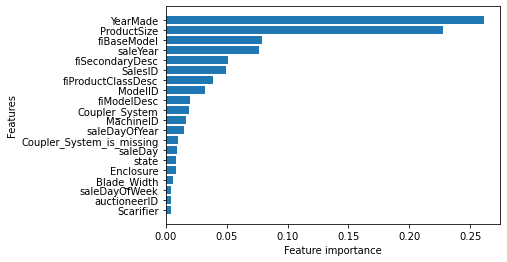

In [335]:
plot_feature(X_train.columns, ideal_model.feature_importances_)